In [ ]:
import numpy as np
import pandas as pd
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Embedding 
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from sklearn import preprocessing
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/EURRUB_161219_181219.csv', sep = ',')

data["<DATE>"] = data["<DATE>"].astype(str)
for i in range(0, len(data["<DATE>"])):
  data["<DATE>"][i] = datetime.datetime(int(data["<DATE>"][i][0:4]), int(data["<DATE>"][i][4:6]), int(data["<DATE>"][i][6:8])).timestamp()
data = data[['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<VOL>', '<CLOSE>']]
data = data.apply(pd.to_numeric)
data

<ipython-input-2-7ab2dad7e611>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["<DATE>"][i] =   datetime.datetime(int(data["<DATE>"][i][0:4]), int(data["<DATE>"][i][4:6]), int(data["<DATE>"][i][6:8])).timestamp()


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<VOL>,<CLOSE>
0,1.482106e+09,0,64.735,65.0585,63.9920,371093,64.3620
1,1.482192e+09,0,64.362,64.4970,63.5720,438148,63.8440
2,1.482278e+09,0,63.844,63.8840,63.4060,405708,63.7520
3,1.482365e+09,0,63.752,63.9530,63.3680,346453,63.5920
4,1.482451e+09,0,63.592,64.0970,63.4220,361645,63.7200
...,...,...,...,...,...,...,...
726,1.544918e+09,0,75.340,75.5160,75.2448,33,75.2568
727,1.545005e+09,0,75.275,76.0400,75.1540,6053,75.5714
728,1.545091e+09,0,75.700,76.5528,75.4922,6350,76.4600
729,1.545178e+09,0,76.544,77.4235,76.2540,6531,76.6110


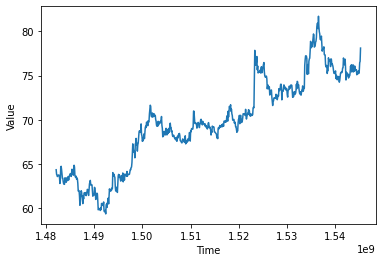

In [ ]:
plt.xlabel("Time")
plt.ylabel("Value")
plt.plot(data["<DATE>"], data["<CLOSE>"])
plt.show()

In [ ]:
dataY = data.iloc[:, 6]
dataX = data.iloc[:, 0:6]
X_train = dataX.iloc[:500, :]
X_test = dataX.iloc[500:, :]
y_train = dataY.iloc[:500]
y_test = dataY.iloc[500:]
y_train

0      64.3620
1      63.8440
2      63.7520
3      63.5920
4      63.7200
        ...   
495    75.8353
496    76.0180
497    76.3012
498    76.4760
499    75.4220
Name: <CLOSE>, Length: 500, dtype: float64

In [ ]:
model = Sequential([
      tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                    input_shape=[None]),
      Bidirectional(LSTM(256)),
      Dense(256, activation = "relu"),
      Dense(256, activation = "relu"),
      Dense(1, activation="linear"),
  ])

model.compile(loss="mae", 
                  optimizer="adam",
                  metrics=["mae"])
history = model.fit(X_train, y_train, batch_size=25, epochs=25,  verbose=1, validation_split=0.1)  

Epoch 1/25
18/18 [==============================] - 6s 123ms/step - loss: 44.4015 - mae: 44.4015 - val_loss: 7.2764 - val_mae: 7.2764
Epoch 2/25
18/18 [==============================] - 1s 39ms/step - loss: 8.0259 - mae: 8.0259 - val_loss: 2.8267 - val_mae: 2.8267
Epoch 3/25
18/18 [==============================] - 1s 38ms/step - loss: 3.7013 - mae: 3.7013 - val_loss: 5.5586 - val_mae: 5.5586
Epoch 4/25
18/18 [==============================] - 1s 38ms/step - loss: 3.3941 - mae: 3.3941 - val_loss: 7.8518 - val_mae: 7.8518
Epoch 5/25
18/18 [==============================] - 1s 37ms/step - loss: 3.0389 - mae: 3.0389 - val_loss: 5.5991 - val_mae: 5.5991
Epoch 6/25
18/18 [==============================] - 1s 38ms/step - loss: 2.9652 - mae: 2.9652 - val_loss: 6.4067 - val_mae: 6.4067
Epoch 7/25
18/18 [==============================] - 1s 38ms/step - loss: 2.8561 - mae: 2.8561 - val_loss: 5.1554 - val_mae: 5.1554
Epoch 8/25
18/18 [==============================] - 1s 36ms/step - loss: 2.4462 

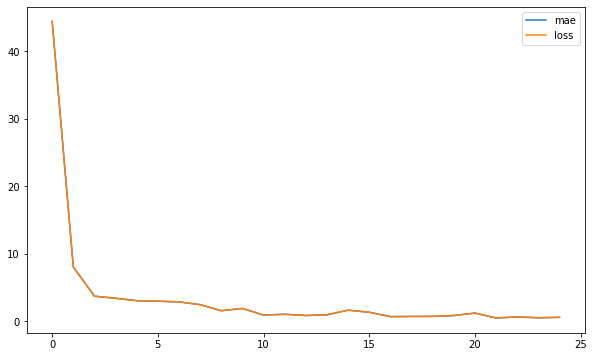

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

16/16 [==============================] - 1s 16ms/step


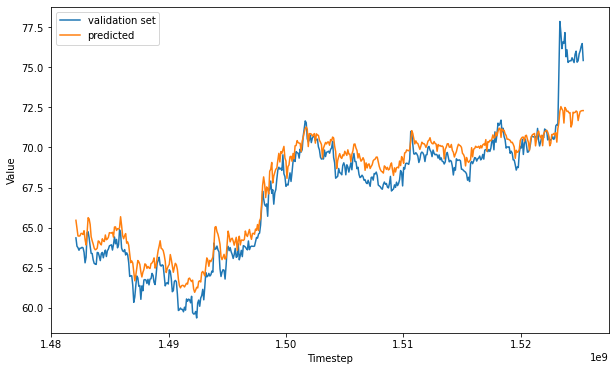

In [ ]:
# предсказание тренеровочных данных
predict = model.predict(X_train)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_train["<DATE>"],y_train, label="validation set")
plt.plot(X_train["<DATE>"],predict, label="predicted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.show()

23/23 [==============================] - 0s 13ms/step


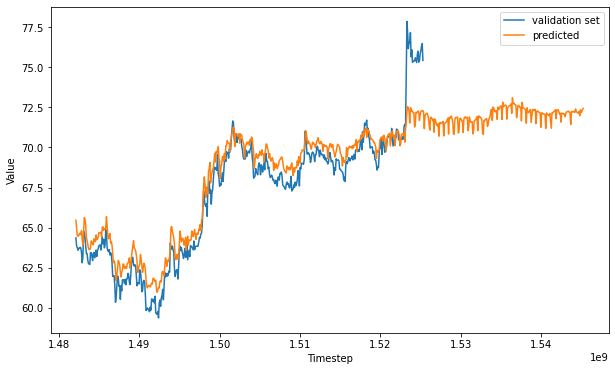

In [ ]:
# предсказание тестовых данных моделью
predict = model.predict(dataX)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_train["<DATE>"],y_train, label="validation set")
plt.plot(dataX["<DATE>"],predict, label="predicted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.show()

23/23 [==============================] - 0s 15ms/step


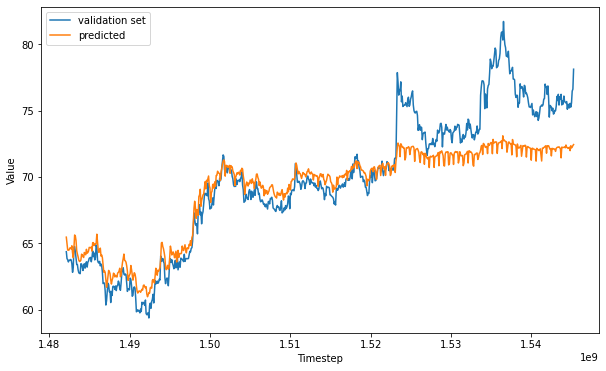

In [ ]:
# реальные данные
predict = model.predict(dataX)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(dataX["<DATE>"],dataY, label="validation set")
plt.plot(dataX["<DATE>"],predict, label="predicted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.show()